# Model Training

In [205]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Modelling
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [206]:
# Импорт scv файла в датафрейм
df = pd.read_csv('data/stud.csv')
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [207]:
# Добавим колонку total_score. Она и будет нашей целевой переменной
df['total_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [208]:
# Разделим зависимые и целевую переменные
X = df.drop(['math_score', 'reading_score', 'writing_score', 'total_score'], axis=1)
y = df['total_score']


In [209]:
# Отделим категориальные переменные от непрерывных 
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

# Создание преобразователей для числовых и категориальных признаков
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first')

# Создание ColumnTransformer, объединяющего оба преобразователя
preprocessor = ColumnTransformer([("OneHotEncoder", encoder, cat_features),
                                  ("StandardScaler", scaler, num_features)])

In [210]:
# Предобрааботка данных
X = preprocessor.fit_transform(X)
X.shape

(1000, 12)

In [211]:
# Разделим данные на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    shuffle=True)
X_train.shape, X_test.shape

((800, 12), (200, 12))

In [212]:
# Функция оценки, которая будет выдавать все показатели после обучения модели
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_square = r2_score(y_test, y_pred)

    return mae, rmse, r2_square

In [213]:
# Словарь моделей с их экземплярами
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Список для хранения rmse моделей
rmse_scores =[]

# Итерация по моделям в словаре
for i, model in enumerate(models.values()):
    # Обучение модели на обучающих данных
    model.fit(X_train, y_train)

    # Получение предсказаний для обучающего и тестового наборов
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Оценка модели с использованием функции evaluate_model
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    # Вывод результатов для каждой модели
    print(list(models.keys())[i])
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    rmse_scores.append(model_test_rmse)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 36.5870
- Mean Absolute Error: 29.8084
- R2 Score: 0.2543
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 40.2047
- Mean Absolute Error: 31.4705
- R2 Score: 0.1622


Lasso
Model performance for Training set
- Root Mean Squared Error: 37.3079
- Mean Absolute Error: 30.1134
- R2 Score: 0.2246
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 41.1526
- Mean Absolute Error: 32.2553
- R2 Score: 0.1222


Ridge
Model performance for Training set
- Root Mean Squared Error: 36.5874
- Mean Absolute Error: 29.8076
- R2 Score: 0.2543
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 40.2204
- Mean Absolute Error: 31.4880
- R2 Score: 0.1615


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 35.1405
- Mean Absolute Error: 28.6375
- R2 Score: 0.3121
---------

In [214]:
# Результаты
pd.DataFrame(list(zip(list(models.keys()), rmse_scores)), 
             columns=['model', 'rmse_scores']).sort_values(by="rmse_scores")


,model,rmse_scores
0,Linear Regression,40.204740
2,Ridge,40.220351
1,Lasso,41.152608
8,AdaBoost Regressor,41.215908
7,CatBoosting Regressor,43.982433
6,XGBRegressor,44.710234
5,Random Forest Regressor,44.781219
3,K-Neighbors Regressor,44.793388
4,Decision Tree,45.573415


In [215]:
# Модель линейной регресии показала себя наилучший образом
linear_model = LinearRegression(fit_intercept=True)

linear_model = linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

score = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE is %.2f" %score)

RMSE is 40.20


Text(0, 0.5, 'Predicted')

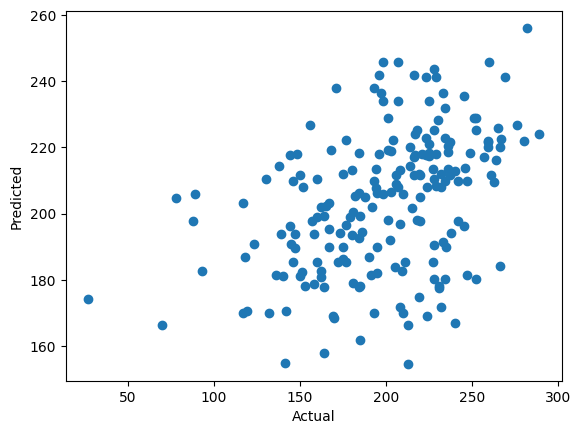

In [216]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

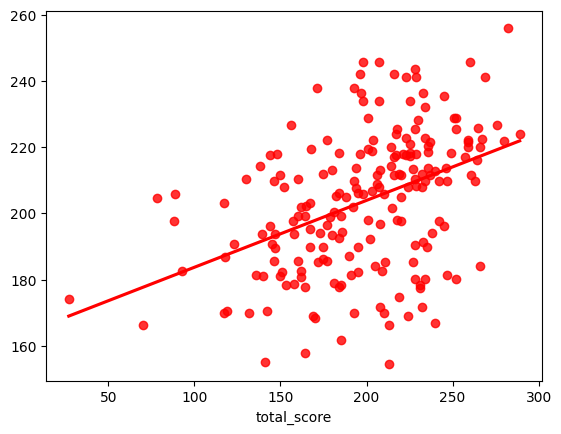

In [217]:
sns.regplot(x=y_test, y=y_pred, ci=None, color ='red');

In [218]:
residuals_df =pd.DataFrame({'actual_value':y_test, 'predicted_value':y_pred, 'difference':y_test - y_pred})
residuals_df

,actual_value,predicted_value,difference
521,261,211.568318,49.431682
737,192,201.842843,-9.842843
740,225,218.387825,6.612175
660,224,169.107478,54.892522
411,245,235.490370,9.509630
...,...,...,...
408,165,202.196329,-37.196329
332,171,238.052679,-67.052679
208,231,178.209748,52.790252
613,216,211.568318,4.431682
